In [35]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from IDS_mapping_formatted import mapping, mapping_missing
import utils as u

In [39]:
df = pl.read_csv(r"C:\Users\norbe\OneDrive\Desktop\Projekty\Diabetes_rehospitalization\data\diabetic_data.csv")
df.head()

encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
i64,i64,str,str,str,str,i64,i64,i64,i64,str,str,i64,i64,i64,i64,i64,i64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
2278392,8222157,"""Caucasian""","""Female""","""[0-10)""","""?""",6,25,1,1,"""?""","""Pediatrics-Endocrinology""",41,0,1,0,0,0,"""250.83""","""?""","""?""",1,"""None""","""None""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""NO"""
149190,55629189,"""Caucasian""","""Female""","""[10-20)""","""?""",1,1,7,3,"""?""","""?""",59,0,18,0,0,0,"""276""","""250.01""","""255""",9,"""None""","""None""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Up""","""No""","""No""","""No""","""No""","""No""","""Ch""","""Yes""",""">30"""
64410,86047875,"""AfricanAmerican""","""Female""","""[20-30)""","""?""",1,1,7,2,"""?""","""?""",11,5,13,2,0,1,"""648""","""250""","""V27""",6,"""None""","""None""","""No""","""No""","""No""","""No""","""No""","""No""","""Steady""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Yes""","""NO"""
500364,82442376,"""Caucasian""","""Male""","""[30-40)""","""?""",1,1,7,2,"""?""","""?""",44,1,16,0,0,0,"""8""","""250.43""","""403""",7,"""None""","""None""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Up""","""No""","""No""","""No""","""No""","""No""","""Ch""","""Yes""","""NO"""
16680,42519267,"""Caucasian""","""Male""","""[40-50)""","""?""",1,1,7,1,"""?""","""?""",51,0,8,0,0,0,"""197""","""157""","""250""",5,"""None""","""None""","""No""","""No""","""No""","""No""","""No""","""No""","""Steady""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Steady""","""No""","""No""","""No""","""No""","""No""","""Ch""","""Yes""","""NO"""


In [51]:
df.describe()

statistic,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
str,f64,f64,str,str,str,str,str,str,str,f64,str,str,f64,f64,f64,f64,f64,f64,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""count""",101766.0,101766.0,"""99493""","""101763""","""101766""","""3197""","""91669""","""97086""","""94699""",101766.0,"""61510""","""51817""",101766.0,101766.0,101766.0,101766.0,101766.0,101766.0,"""101766""","""101766""","""101766""",101766.0,"""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766""","""101766"""
"""null_count""",0.0,0.0,"""2273""","""3""","""0""","""98569""","""10097""","""4680""","""7067""",0.0,"""40256""","""49949""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",1.6520e8,5.4330e7,null,null,null,null,null,null,null,4.395987,null,null,43.095641,1.33973,16.021844,0.369357,0.197836,0.635566,null,null,null,7.422607,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""std""",1.0264e8,3.8696e7,null,null,null,null,null,null,null,2.985108,null,null,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,null,null,null,1.9336,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""min""",12522.0,135.0,"""AfricanAmerican""","""Female""","""[0-10)""",""">200""","""Elective""","""Admitted as an inpatient to th…","""Clinic Referral""",1.0,"""BC""","""AllergyandImmunology""",1.0,0.0,1.0,0.0,0.0,0.0,"""10""","""11""","""11""",1.0,""">200""",""">7""","""Down""","""Down""","""Down""","""Down""","""Down""","""No""","""Down""","""Down""","""No""","""Down""","""Down""","""Down""","""Down""","""No""","""No""","""No""","""No""","""Down""","""Down""","""No""","""No""","""No""","""No""","""Ch""","""No""","""<30"""
"""25%""",8.4960072e7,2.3413212e7,null,null,null,null,null,null,null,2.0,null,null,31.0,0.0,10.0,0.0,0.0,0.0,null,null,null,6.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""50%""",1.5238968e8,4.5505143e7,null,null,null,null,null,null,null,4.0,null,null,44.0,1.0,15.0,0.0,0.0,0.0,null,null,null,8.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""75%""",2.30271972e8,8.7546186e7,null,null,null,null,null,null,null,6.0,null,null,57.0,2.0,20.0,0.0,0.0,1.0,null,null,null,9.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""max""",4.43867222e8,1.89502619e8,"""Other""","""Male""","""[90-100)""","""[75-100)""","""Urgent""","""Still patient or expected to r…","""Transfer from hospital i

In [ ]:
# TODO: zbadać ile encounterów jest na pacjenta i jak się do tego ma "readmitted"?
# TODO: napisać funkcję do wykrywwania częstości w próbie i wyświetlania razem z exposure
# TODO: Zastąpić "?", Unknow/Invalid, admission_type_id (5,6,8) na NA

In [ ]:
df = u.replace_values(df, mapping)
df = u.replace_values(df, mapping_missing)

In [50]:
print(df.head)

<bound method DataFrame.head of shape: (101_766, 50)
┌────────────┬────────────┬────────────┬────────┬───┬────────────┬────────┬────────────┬───────────┐
│ encounter_ ┆ patient_nb ┆ race       ┆ gender ┆ … ┆ metformin- ┆ change ┆ diabetesMe ┆ readmitte │
│ id         ┆ r          ┆ ---        ┆ ---    ┆   ┆ pioglitazo ┆ ---    ┆ d          ┆ d         │
│ ---        ┆ ---        ┆ str        ┆ str    ┆   ┆ ne         ┆ str    ┆ ---        ┆ ---       │
│ i64        ┆ i64        ┆            ┆        ┆   ┆ ---        ┆        ┆ str        ┆ str       │
│            ┆            ┆            ┆        ┆   ┆ str        ┆        ┆            ┆           │
╞════════════╪════════════╪════════════╪════════╪═══╪════════════╪════════╪════════════╪═══════════╡
│ 2278392    ┆ 8222157    ┆ Caucasian  ┆ Female ┆ … ┆ No         ┆ No     ┆ No         ┆ NO        │
│ 149190     ┆ 55629189   ┆ Caucasian  ┆ Female ┆ … ┆ No         ┆ Ch     ┆ Yes        ┆ >30       │
│ 64410      ┆ 86047875   ┆ AfricanAme

In [37]:
u.show_null(df)

AttributeError: module 'utils' has no attribute 'show_null'

C:\Users\norbe\AppData\Local\Temp\ipykernel_20240\647069100.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


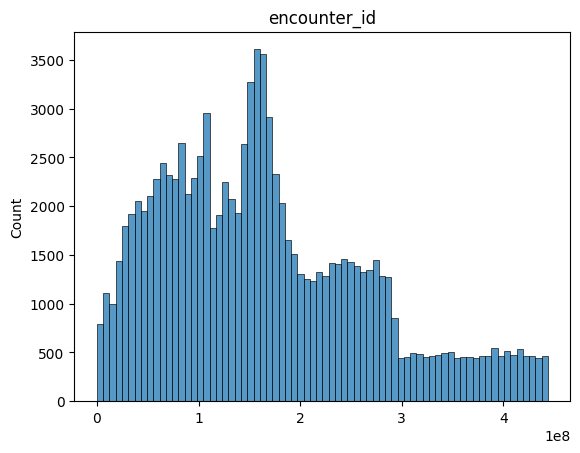

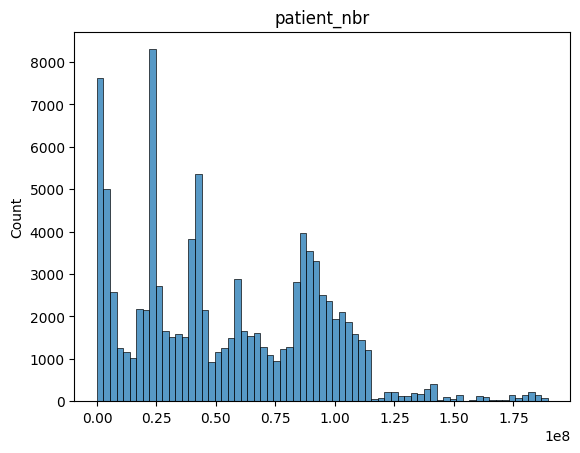

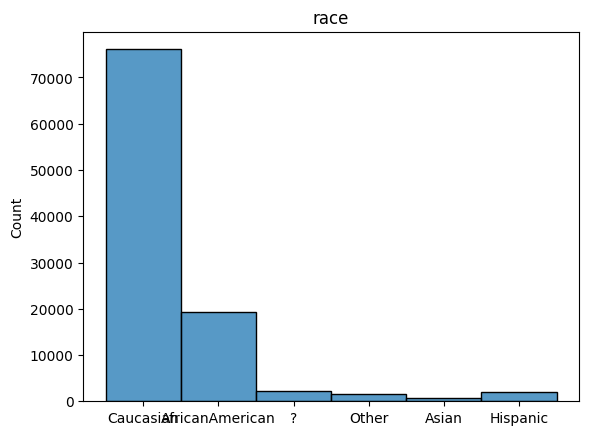

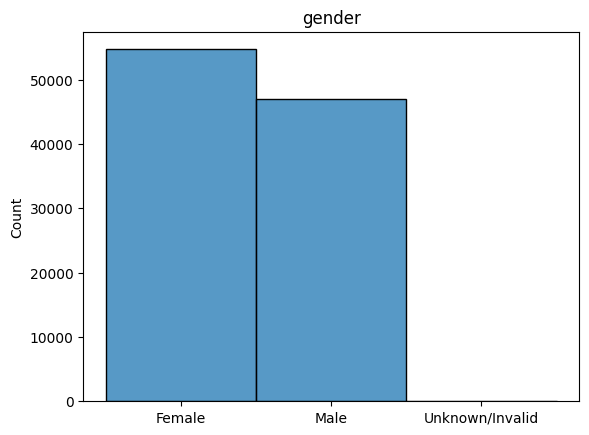

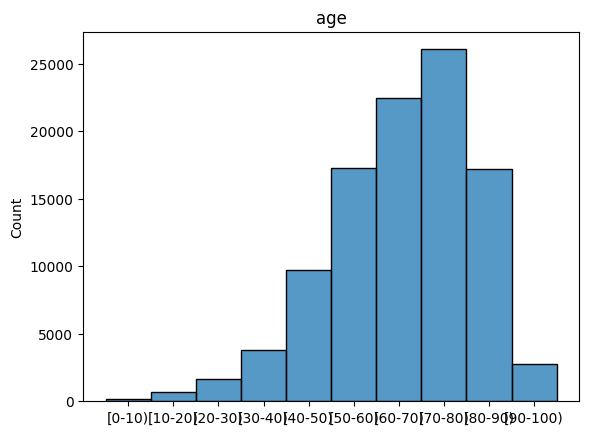

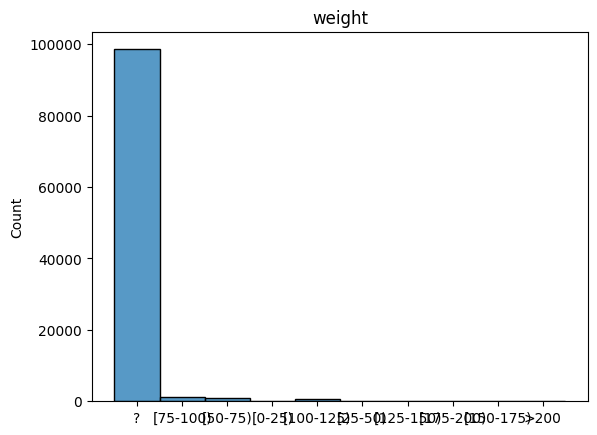

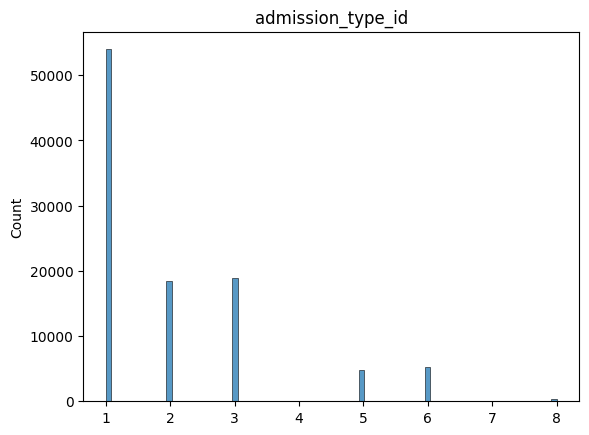

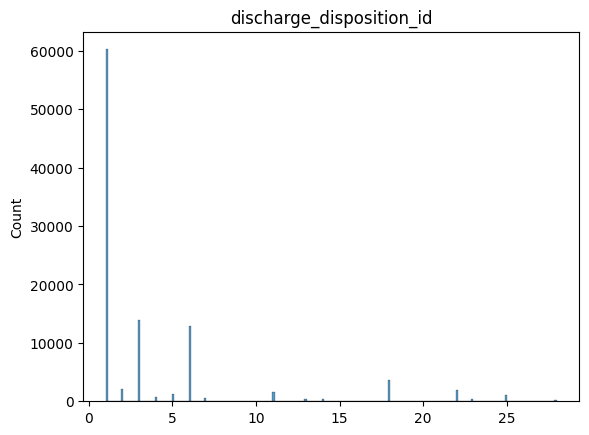

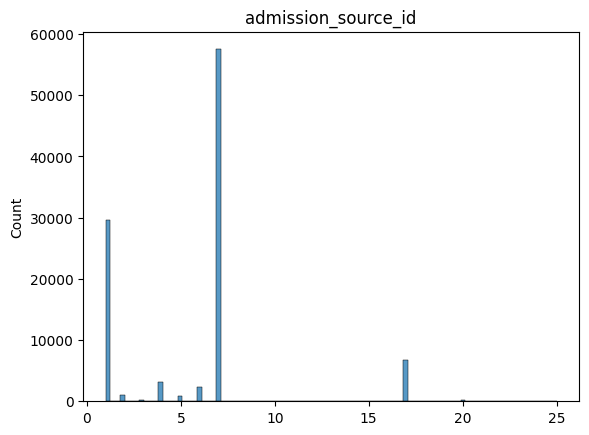

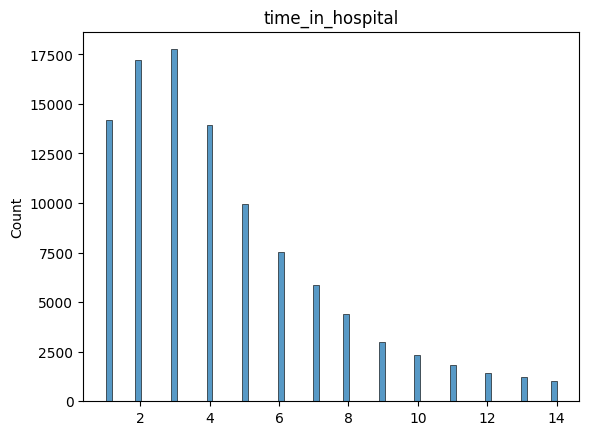

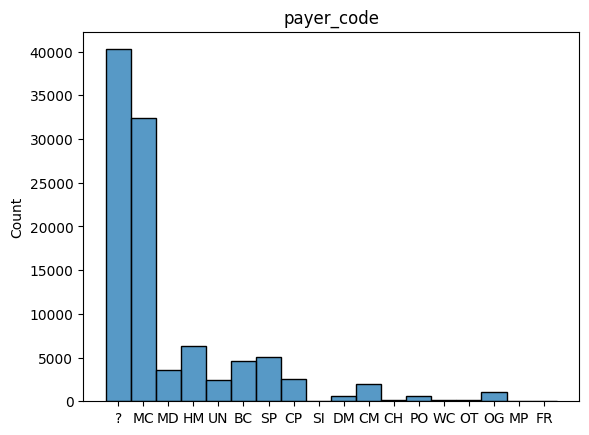

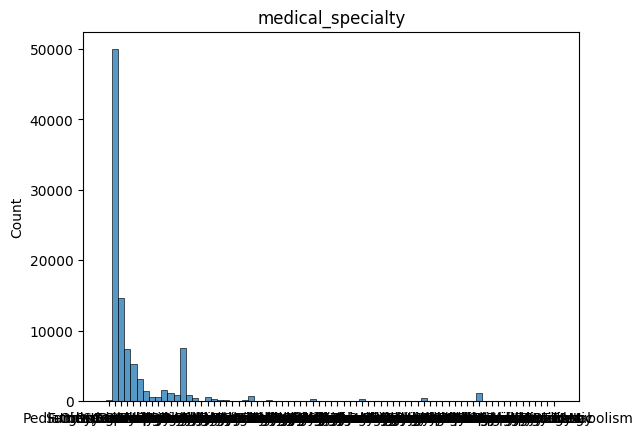

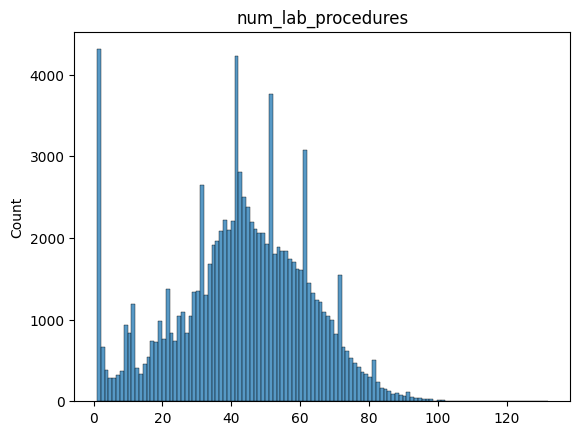

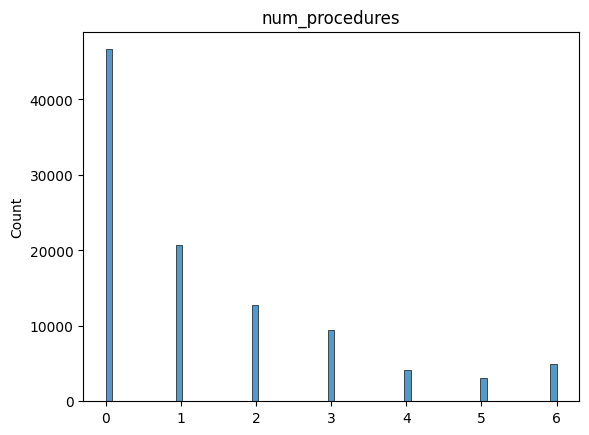

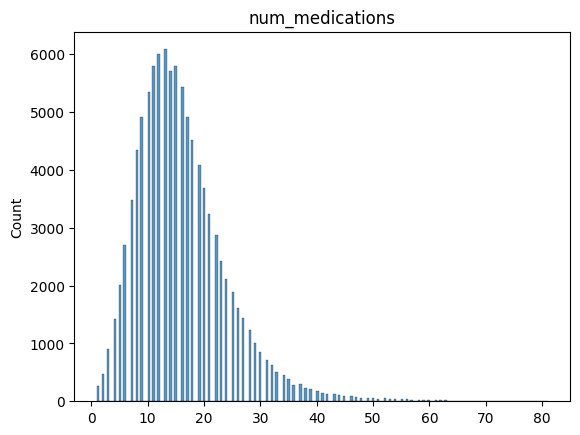

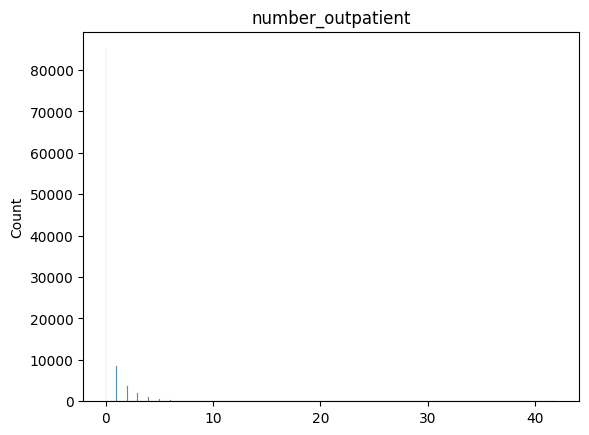

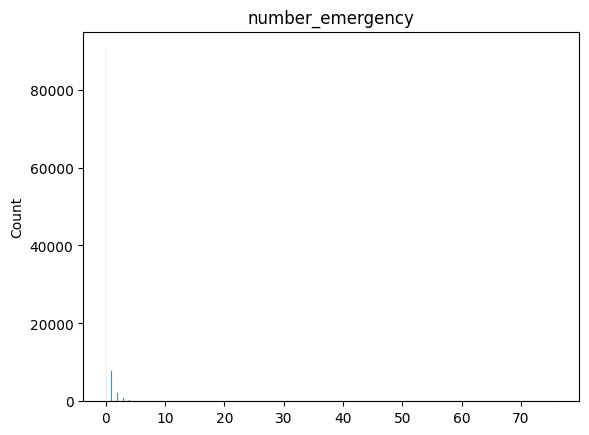

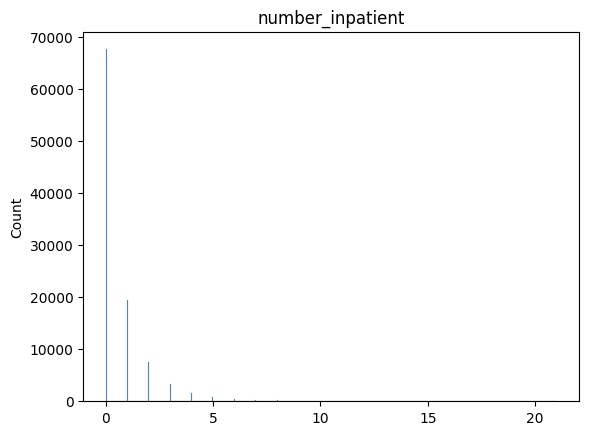

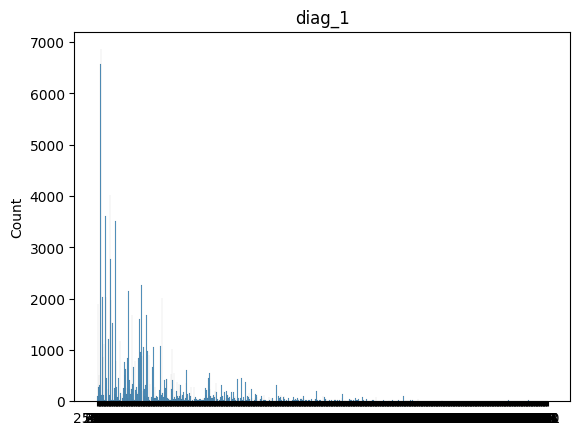

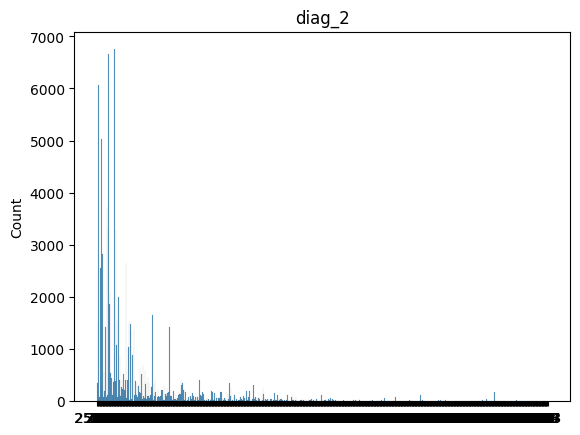

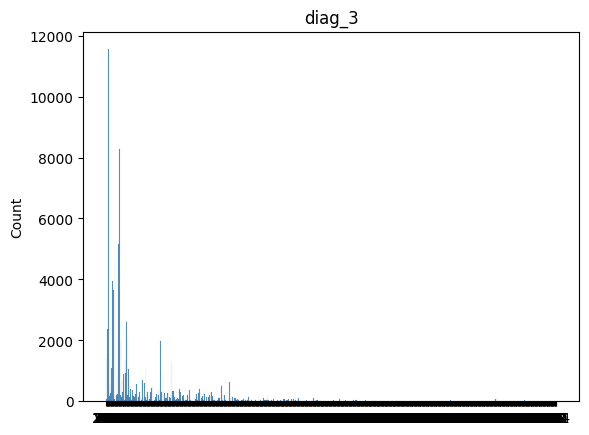

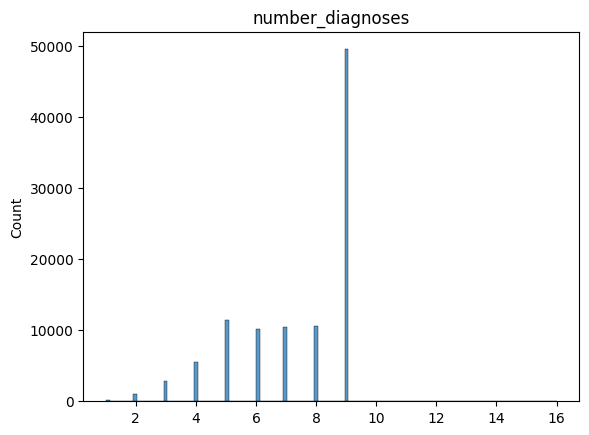

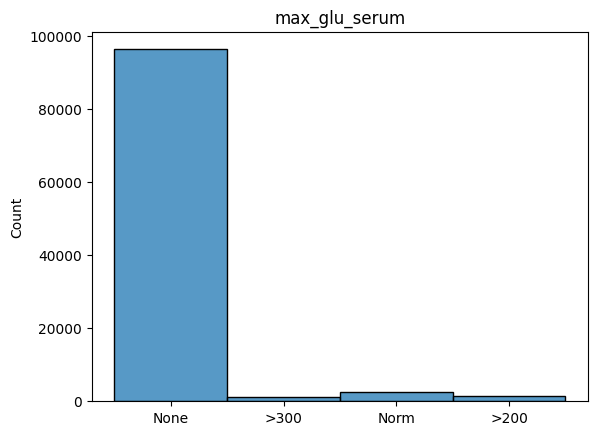

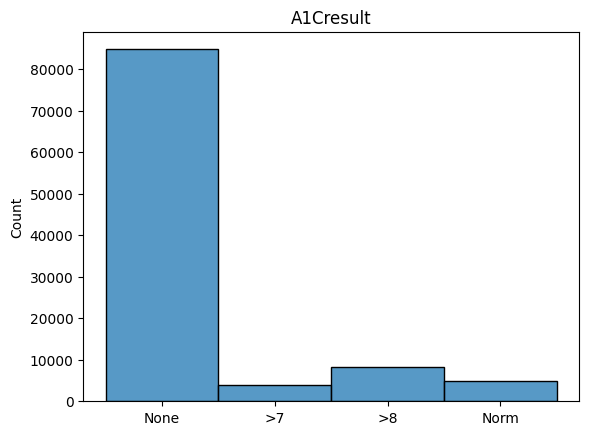

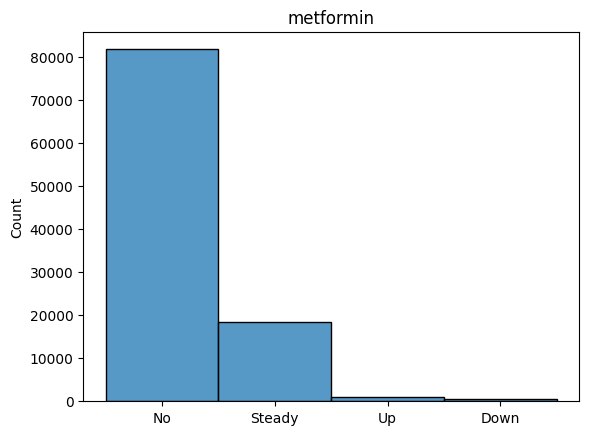

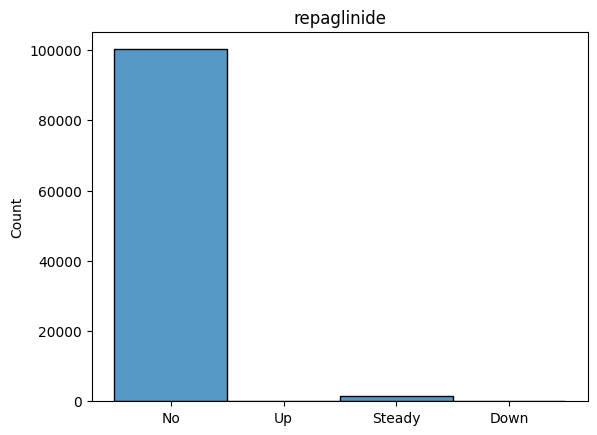

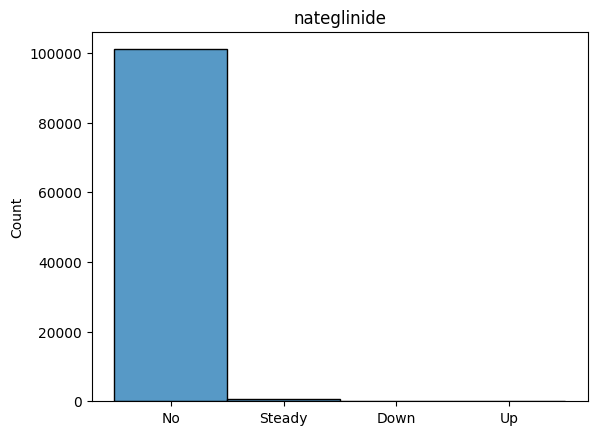

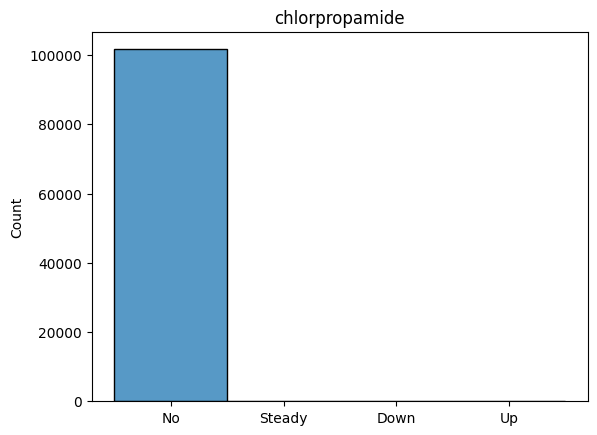

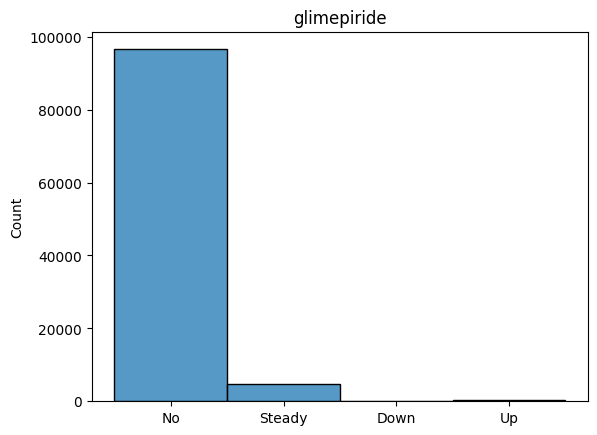

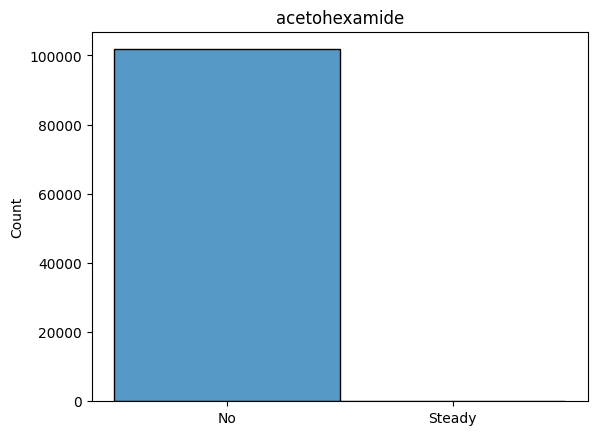

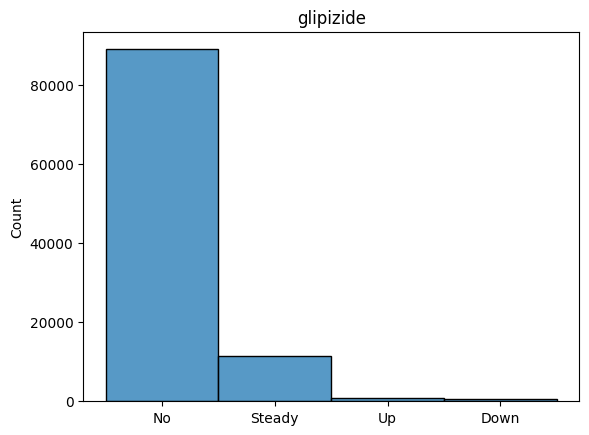

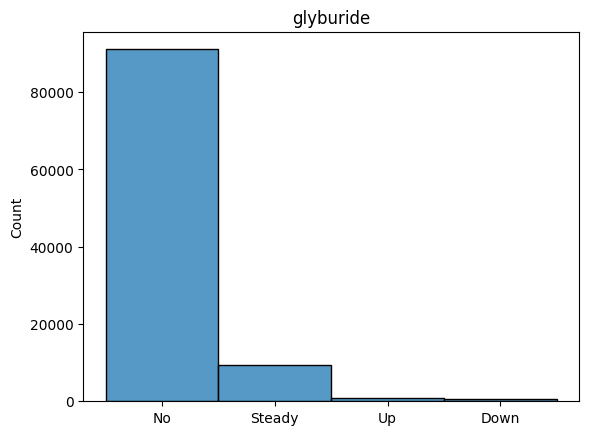

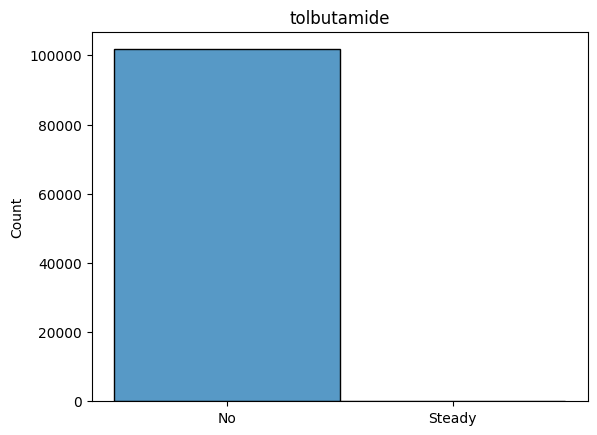

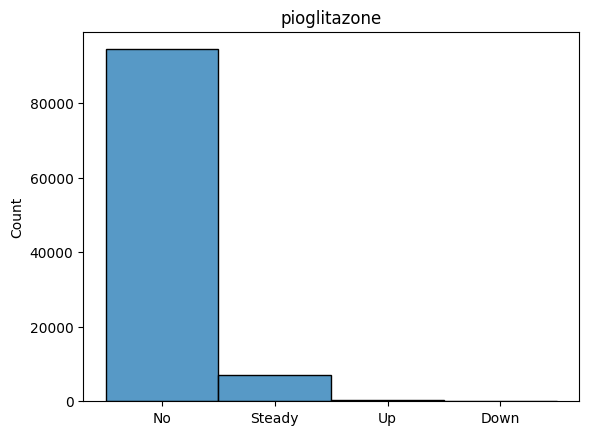

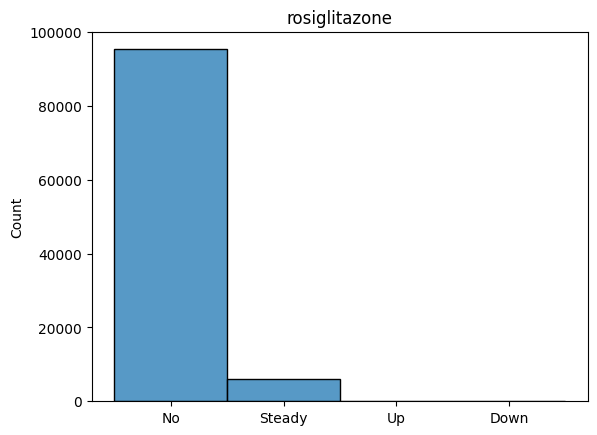

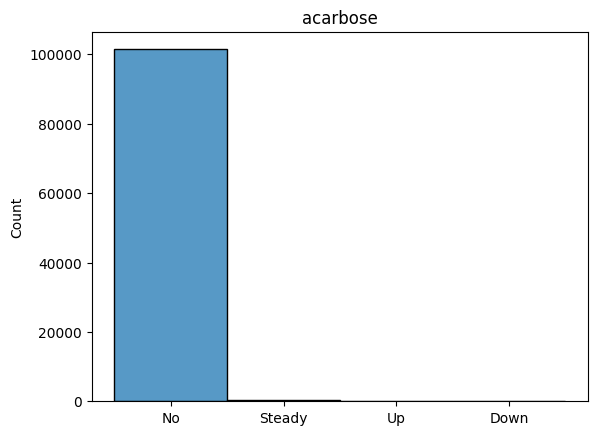

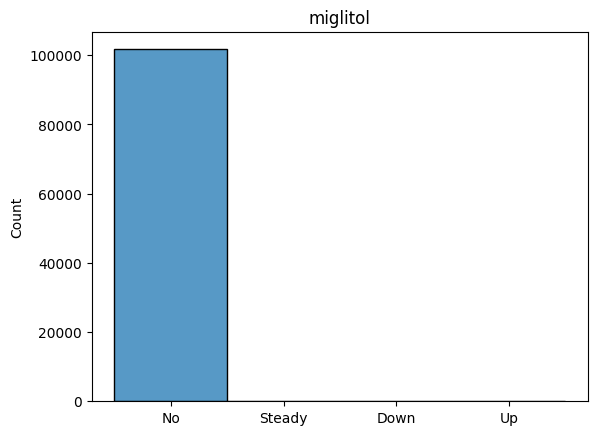

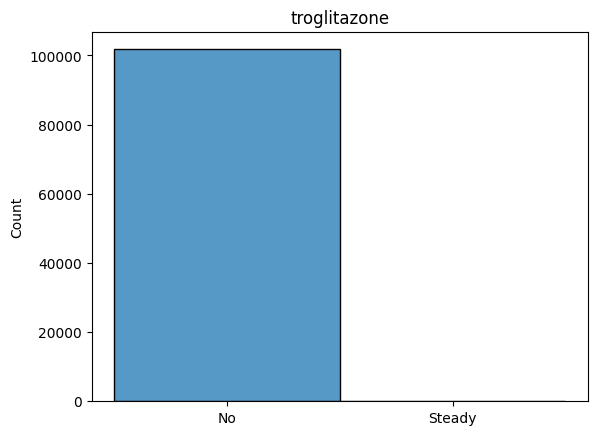

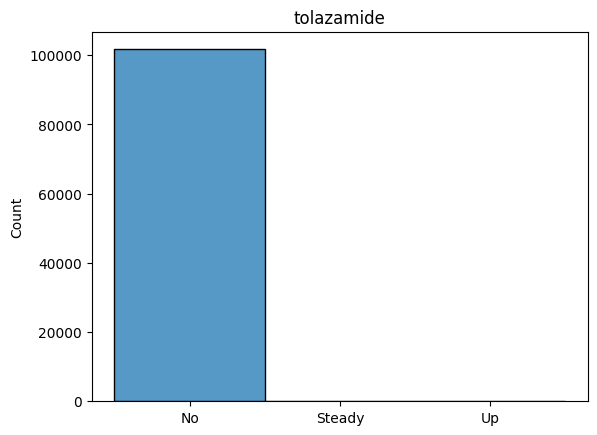

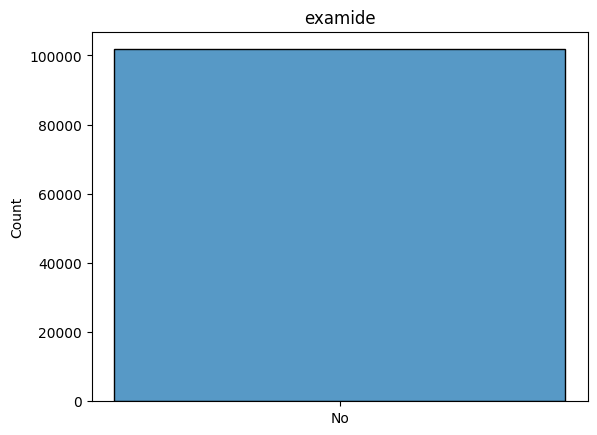

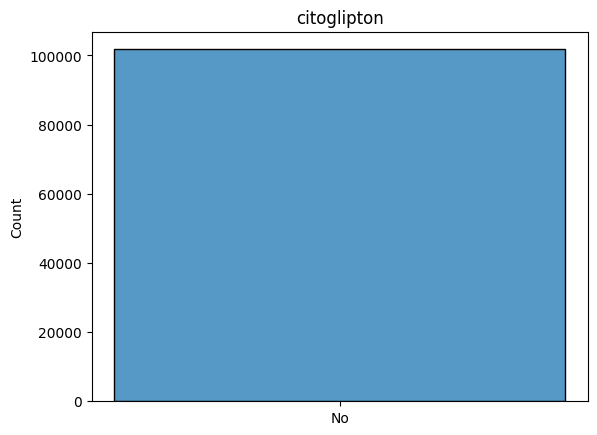

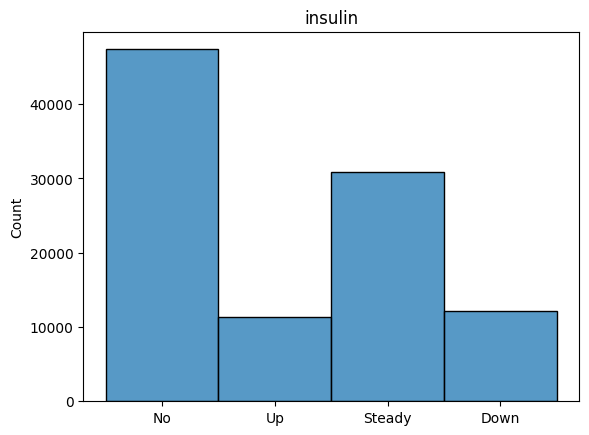

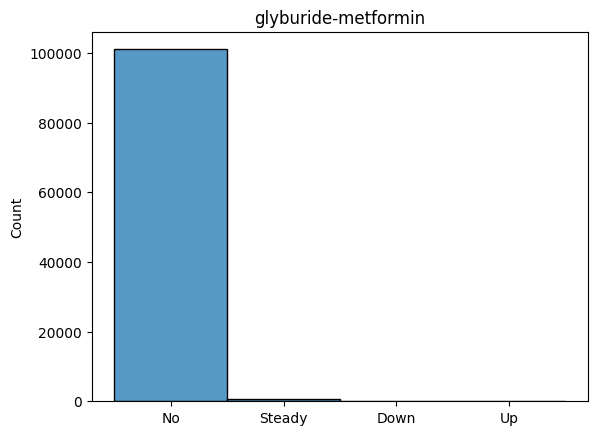

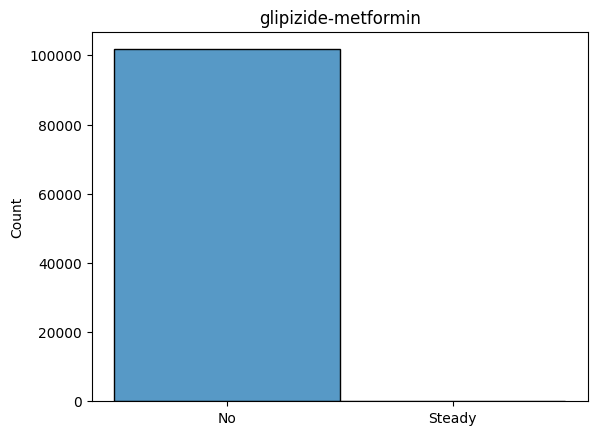

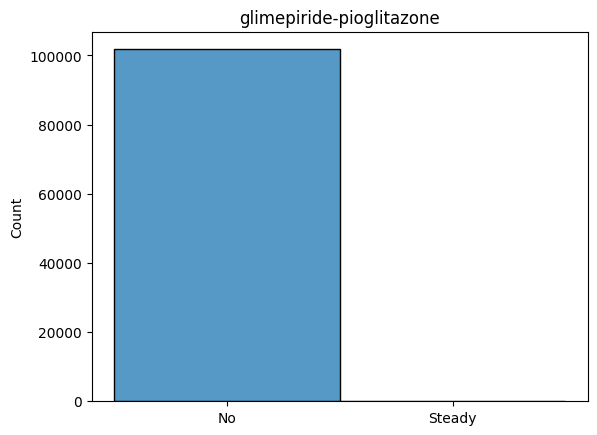

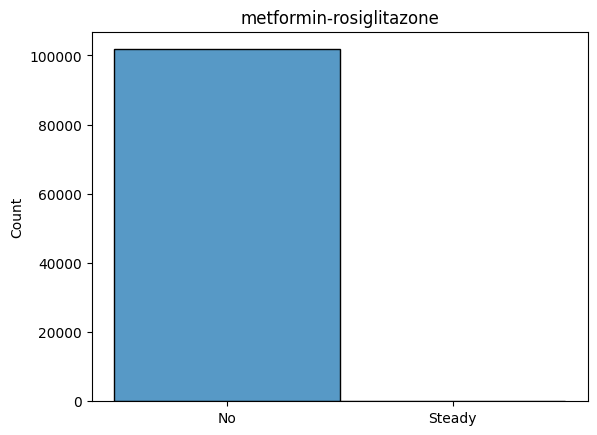

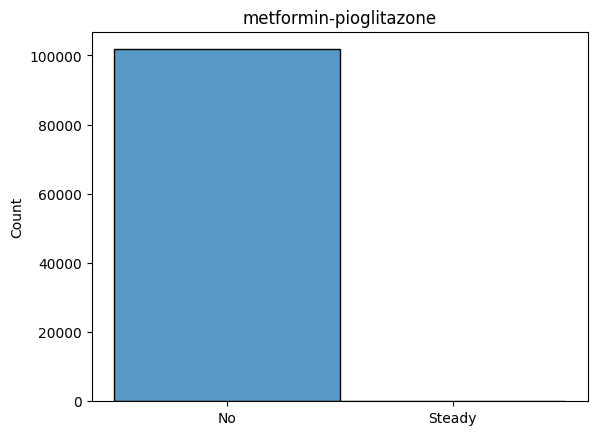

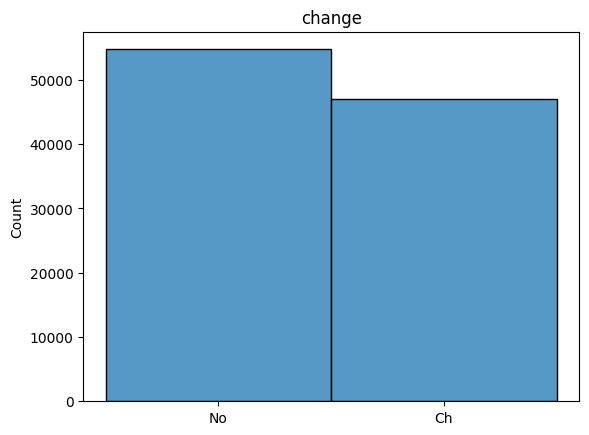

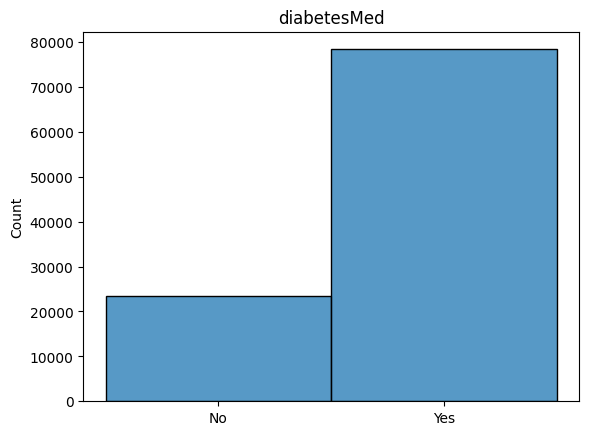

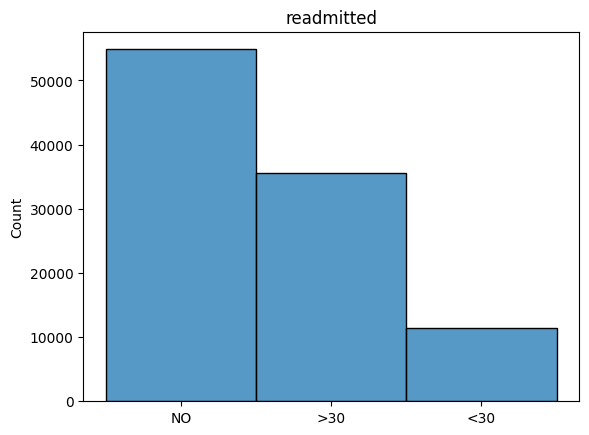

In [ ]:
to_exclude = ["encounter_id", "patient_nbr"]

for i, pack in enumerate(zip(df.dtypes, df.columns)):
    type, col = pack
    # if type == pl.Int64:
    plt.figure(i)
    plt.title(col)
    sns.histplot(data = df[col])
    # elif type == pl.String:
    #     print(col)
    # else:
    #     print("Nieobslugiwany typ:", type)